In [2]:
import pandas as pd

# Load the dataset
file_path = "MORTH DATA/Model_2_dataset.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,Index,States/UTs,Persons killed in road accidents,Persons killed/Lakh Population,Killed per 10000 vehicles,Urban,Rural,non-wearing of helmet,non-wearing of seat belt,over speeding,drunk driving,driving wrong side,jumping red light,using mobile phone
0,1,Andhra Pradesh,8293,15.7,5.4,2092,6201,3042,895,6760,31,322,6,126
1,2,Arunachal Pradesh,148,9.6,3.2,103,45,32,15,65,22,15,0,5
2,3,Assam,2994,8.5,6.0,1591,1403,347,450,1933,139,330,60,122
3,4,Bihar,8898,7.1,6.8,2859,6039,960,180,4928,40,1309,0,13
4,5,Chhattisgarh,5834,19.6,6.6,1168,4666,3714,636,4808,40,147,8,7


## Correlation Analysis

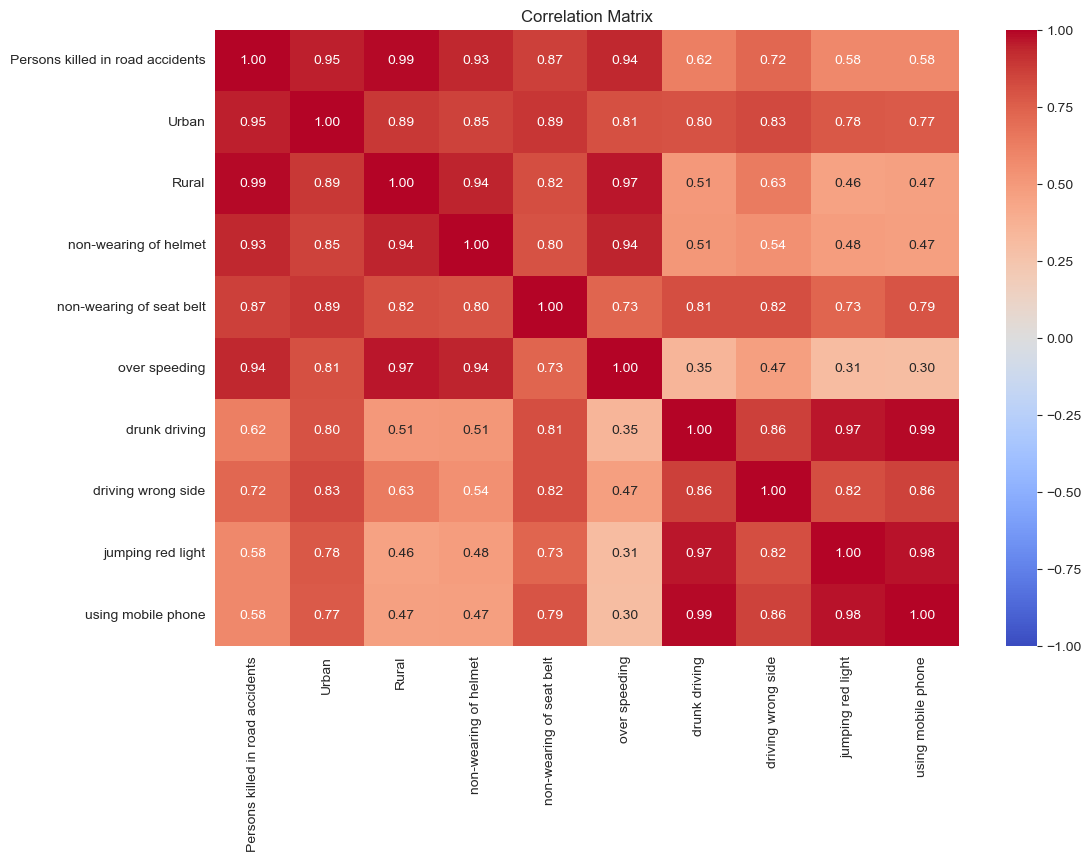

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant columns for correlation analysis (numerical variables)
correlation_data = data.drop(columns=["Index", "States/UTs", "Persons killed/Lakh Population", "Killed per 10000 vehicles"])

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the heatmap to visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

## Importance using Random Forest Regressor

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features and target variable
X = correlation_data.drop(columns=["Persons killed in road accidents", "Rural", "Urban"])
y = correlation_data["Persons killed in road accidents"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Display the feature importances
feature_importances.reset_index(drop=True, inplace=True)
feature_importances

,Feature,Importance
0,over speeding,0.619653
1,non-wearing of helmet,0.268760
2,driving wrong side,0.038307
3,non-wearing of seat belt,0.028739
4,jumping red light,0.020473
5,using mobile phone,0.013347
6,drunk driving,0.010720


## Factor Analysis

In [14]:
from sklearn.decomposition import FactorAnalysis

# Perform Factor Analysis
fa = FactorAnalysis(n_components=4, random_state=42)
factors = fa.fit_transform(X_scaled)

# Create a DataFrame for factor loadings
factor_loadings = pd.DataFrame(
    fa.components_,
    columns=X.columns,
    index=[f"Factor {i+1}" for i in range(fa.components_.shape[0])]
)

# Display the factor loadings
factor_loadings


,non-wearing of helmet,non-wearing of seat belt,over speeding,drunk driving,driving wrong side,jumping red light,using mobile phone
Factor 1,0.586540,0.851128,0.434332,0.988985,0.878008,0.972108,0.988198
Factor 2,0.773194,0.409084,0.894216,-0.086418,0.091697,-0.130512,-0.140649
Factor 3,0.076833,-0.252475,0.014295,-0.026948,-0.171261,0.158645,-0.021736
Factor 4,-0.139354,-0.021261,0.038268,-0.013976,0.221536,0.027581,-0.004180


C:\Users\moond.DESKTOP-8AMI9S8\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\moond.DESKTOP-8AMI9S8\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\moond.DESKTOP-8AMI9S8\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
C:\Users\moond.DESKTOP-8AMI9S8\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

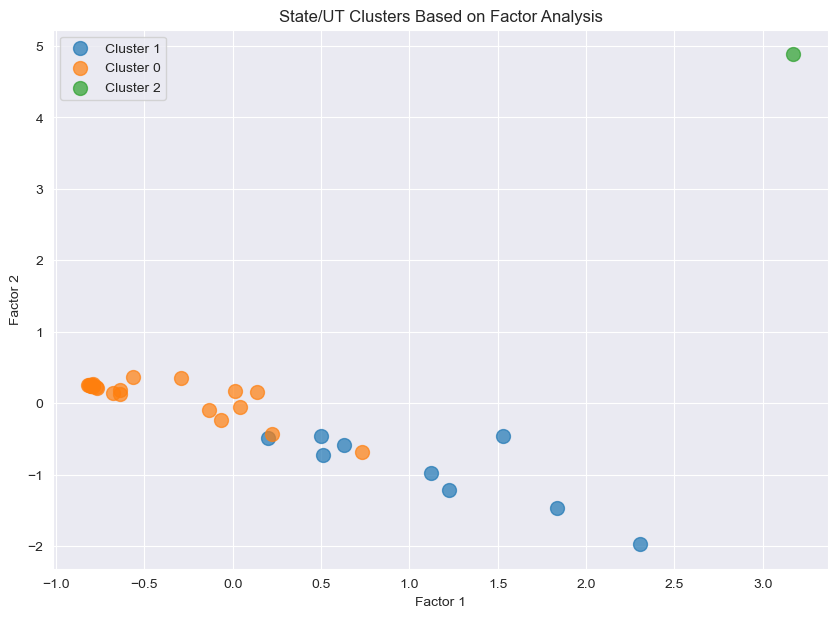

In [1]:
import pandas as pd
from sklearn.decomposition import FactorAnalysis
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
file_path = "MORTH DATA/Model_2_dataset.csv"  # Replace with your dataset path
data = pd.read_csv(file_path)

# Drop specified columns
data_cleaned = data.drop(columns=["Persons killed/Lakh Population", "Killed per 10000 vehicles"])

# Select data for factor analysis (all numerical columns except Index and States/UTs)
numerical_data = data_cleaned.drop(columns=["Index", "States/UTs"])

# Perform Factor Analysis
fa = FactorAnalysis(n_components=3, random_state=42)
factors = fa.fit_transform(numerical_data)

# Add factor scores to the dataset
factor_scores = pd.DataFrame(factors, columns=[f"Factor {i+1}" for i in range(factors.shape[1])])
data_with_factors = pd.concat([data_cleaned[["States/UTs"]], factor_scores], axis=1)

# Perform clustering based on factor scores
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(factor_scores)
data_with_factors["Cluster"] = clusters

# Save the results to a CSV file
data_with_factors.to_csv("Clustered_States_Factor_Scores.csv", index=False)

# Scatter Plot to Show Clusters
plt.figure(figsize=(10, 7))
for cluster in data_with_factors["Cluster"].unique():
    cluster_data = data_with_factors[data_with_factors["Cluster"] == cluster]
    plt.scatter(
        cluster_data["Factor 1"],
        cluster_data["Factor 2"],
        label=f"Cluster {cluster}",
        s=100,
        alpha=0.7
    )

plt.title("State/UT Clusters Based on Factor Analysis")
plt.xlabel("Factor 1")
plt.ylabel("Factor 2")
plt.legend()
plt.grid(True)
plt.show()


In [2]:
data_with_factors

,States/UTs,Factor 1,Factor 2,Factor 3,Cluster
0,Andhra Pradesh,0.630850,-0.581542,-0.470818,1
1,Arunachal Pradesh,-0.791854,0.272035,-0.245606,0
2,Assam,-0.294091,0.357380,0.486494,0
3,Bihar,0.729705,-0.682696,3.512024,0
4,Chhattisgarh,0.202228,-0.491200,-1.740193,1
5,Goa,-0.770536,0.216852,-0.289076,0
6,Gujarat,0.511224,-0.731693,-0.344924,1
7,Haryana,0.038555,-0.055875,0.931769,0
8,Himachal Pradesh,-0.637755,0.183632,0.083629,0
9,Jharkhand,-0.135886,-0.100038,-0.718197,0
